#### Aim:

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making.

A classic example of a corpus of such street level photographs was considered for case study: Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. 

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. 

##### Description:

In this hands-on project the goal isto build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. 

First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. 

We will compare the computational efficiency and accuracy between the traditional methods and neural networks. 

##### Dataset:

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formattingbut comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). 

SVHN is obtained from house numbers in Google Street View images.  

In [0]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Neural Networks/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## Importing the required libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Using TensorFlow backend.


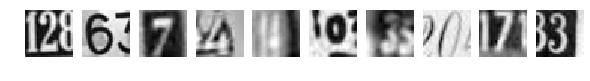

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [5]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, y_train1.shape)
print('Test set', X_test.shape, y_test1.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [7]:
print(X_test.shape)
print(y_test1.shape)

(18000, 1024)
(18000,)


In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 32

In [9]:
num_classes

10

In [0]:
x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())

In [0]:
x_tr =x_tr[:2000]
x_te =x_te[:2000]

In [0]:
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]

In [13]:
print(len(x_tr))
print(len(y_tr))
print(len(x_te))
print(len(y_tr))

2000
2000
2000
2000


In [0]:
a =[]
j = []
def knnvalue(k):
    from sklearn.neighbors import KNeighborsClassifier
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'uniform', metric='euclidean')
    NNH.fit(x_tr, y_tr)
    predicted_labels = NNH.predict(x_te)
    from sklearn.metrics import accuracy_score
    ascore = accuracy_score(y_te, predicted_labels)
    MSE = 1-ascore
    a.append(MSE)
    j.append(k)
    print(ascore)

In [48]:
for i in range(1,30,2):
    knnvalue(i)

0.2975
0.292
0.3015
0.307
0.3055
0.311
0.2975
0.294
0.2975
0.2935
0.2945
0.2955
0.2865
0.2805
0.279


In [0]:
#From the above run, the max accuracy is attained at k value of 1. Now lets train the model for k value of 
#30 and print the metrics
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 11 , weights = 'uniform', metric='euclidean')
NNH.fit(x_tr, y_tr)
pred=NNH.predict(x_te)

In [53]:
pred[0]

6

In [54]:
y_test1[0]

1

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_te)

array([[105,  15,  16,  25,  17,  34,  35,  11,  50,  55],
       [ 17, 101,  29,  33,  32,  30,  22,  25,  19,  17],
       [ 14,  14,  73,  23,  18,  22,  21,  49,  20,  23],
       [ 10,  10,  14,  36,   9,  15,  22,  23,  16,   9],
       [ 12,  17,  11,  10,  93,  15,  17,  13,  17,  14],
       [ 10,   6,   5,  24,   6,  43,  11,   3,  10,  14],
       [ 25,   9,   8,  11,  10,  21,  51,  10,  29,  16],
       [  4,   8,  16,  12,   7,   4,   5,  65,   1,  10],
       [  7,   2,   3,   4,   2,  11,   4,   0,  19,   8],
       [ 17,   3,  12,   7,  10,  16,  14,   6,  17,  36]])

The accuracy of the KNN model is very poor. The max accuracy is obtained (or the lowest MSE) is attained at k =11. Even then, the accuracy is close to 30%

## Neural Network Model

In [0]:
from keras.layers import BatchNormalization

In [63]:
# define model
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D



def nn_model():
    # create model
    model = Sequential()  
    model.add(BatchNormalization(input_shape = (1024,)))  ### Batch_Norm Layer
    
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    sgd = optimizers.Adam(lr=1e-3)
    model.compile(loss=losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy
    return model

# build the model
model = nn_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Error: %.2f%%" % (100-scores[1]*100))

model.summary()

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
 - 2s - loss: 1.5298 - acc: 0.4847 - val_loss: 1.0465 - val_acc: 0.6742
Epoch 2/30
 - 2s - loss: 0.9724 - acc: 0.6959 - val_loss: 0.9098 - val_acc: 0.7159
Epoch 3/30
 - 2s - loss: 0.8173 - acc: 0.7486 - val_loss: 0.8234 - val_acc: 0.7464
Epoch 4/30
 - 2s - loss: 0.7333 - acc: 0.7725 - val_loss: 0.7403 - val_acc: 0.7778
Epoch 5/30
 - 2s - loss: 0.6619 - acc: 0.7968 - val_loss: 0.7220 - val_acc: 0.7846
Epoch 6/30
 - 2s - loss: 0.6083 - acc: 0.8104 - val_loss: 0.7070 - val_acc: 0.7962
Epoch 7/30
 - 2s - loss: 0.5786 - acc: 0.8202 - val_loss: 0.6481 - val_acc: 0.8099
Epoch 8/30
 - 2s - loss: 0.5403 - acc: 0.8329 - val_loss: 0.6509 - val_acc: 0.8126
Epoch 9/30
 - 2s - loss: 0.5109 - acc: 0.8408 - val_loss: 0.6444 - val_acc: 0.8160
Epoch 10/30
 - 2s - loss: 0.4877 - acc: 0.8485 - val_loss: 0.6588 - val_acc: 0.8126
Epoch 11/30
 - 2s - loss: 0.4643 - acc: 0.8529 - val_loss: 0.6406 - val_acc: 0.8177
Epoch 12/30
 - 2s - loss: 0.4480 - 

#### <u>Inference</u>

Deep Learning model is able to work with huge amount of data, particularly, multi - dimensional data and was able to perform better than that of traditional KNN model

#### Summary: 
The SVHN Dataset contained multiple digit images in different colors, sizes and orientation. Data augmentation: cropping, scaling and shearing would have produced better result.
